In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [63]:
cian = pd.read_csv('cian.csv')

In [64]:
cian.columns

Index(['Unnamed: 0', 'ID_number', 'Number_of_rooms', 'Metro', 'Address',
       'Residental_space', 'House', 'Parking', 'Price', 'Description',
       'Repair', 'Balcony', 'Windows', 'Bathroom_toilet',
       'Children_pets allowed', 'Additionally', 'Name_of_residental',
       'Height_of_ceilings', 'Elevator', 'Garbage_chute',
       'Description_length'],
      dtype='object')

In [65]:
cian_cut = cian[['ID_number', 'Price', 'Children_pets allowed', 'Additionally', 'Name_of_residental', 
                 'Height_of_ceilings', 'Elevator', 'Garbage_chute']]
cian_cut.shape

(19737, 8)

In [66]:
cian_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_number              19737 non-null  int64  
 1   Price                  19737 non-null  int64  
 2   Children_pets allowed  14822 non-null  object 
 3   Additionally           19465 non-null  object 
 4   Name_of_residental     4456 non-null   object 
 5   Height_of_ceilings     10535 non-null  float64
 6   Elevator               15545 non-null  object 
 7   Garbage_chute          11730 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.2+ MB


/tmp/ipykernel_38896/3072912577.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(cian_cut, y='Price', palette='dark:#5A9_r', jitter=0.5, size=1.0)


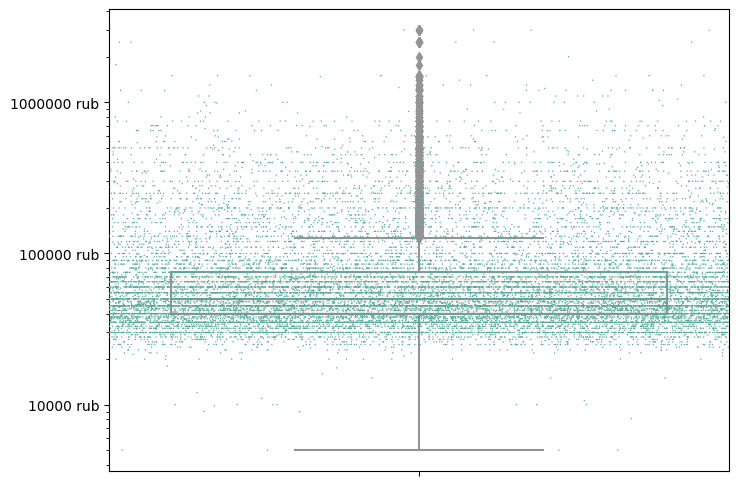

In [67]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(cian_cut, y='Price', width=.8, palette="vlag")
sns.stripplot(cian_cut, y='Price', palette='dark:#5A9_r', jitter=0.5, size=1.0)
ax.set_yscale('log')
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)} rub'));

## ['Children_pets allowed']

### Research

In [68]:
cian_cut['Children_pets allowed'].isnull().value_counts()

False    14822
True      4915
Name: Children_pets allowed, dtype: int64

In [69]:
cian_cut['Children_pets_modified'] = cian_cut['Children_pets allowed'].replace(np.nan, 'Пусто')

/tmp/ipykernel_38896/1289444808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Children_pets_modified'] = cian_cut['Children_pets allowed'].replace(np.nan, 'Пусто')


In [70]:
cian_cut['Children_pets_modified'].value_counts()

Можно с детьми                       8540
Можно с детьми, Можно с животными    6075
Пусто                                4915
Можно с животными                     207
Name: Children_pets_modified, dtype: int64

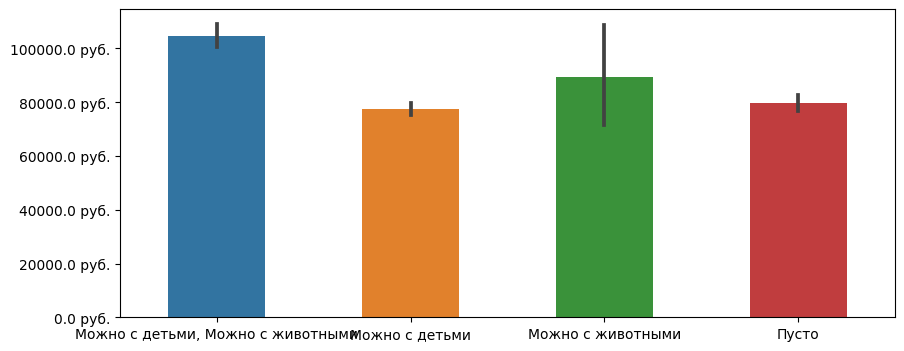

In [71]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.barplot(cian_cut, x='Children_pets_modified', y='Price', errorbar='ci', width=0.5)
ax.set_xlabel('')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{y} руб.'))

/tmp/ipykernel_38896/3948857501.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(cian_cut, x='Children_pets_modified', y='Price', palette='dark:#5A9_r', jitter=0.3, size=1.0)


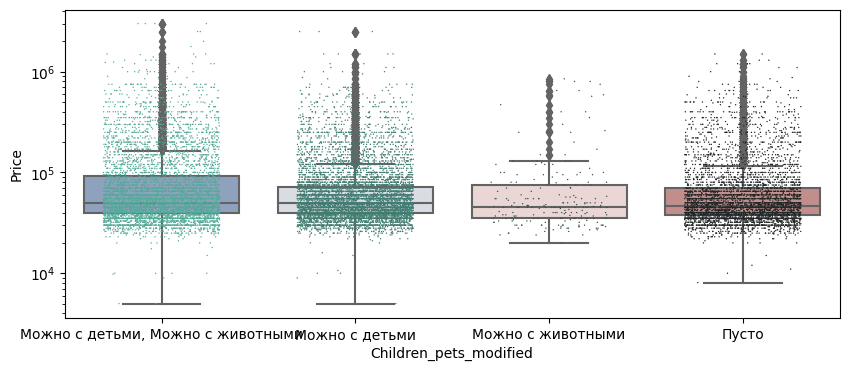

In [72]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.boxplot(cian_cut, x='Children_pets_modified', y='Price', width=.8, palette="vlag")
sns.stripplot(cian_cut, x='Children_pets_modified', y='Price', palette='dark:#5A9_r', jitter=0.3, size=1.0)
ax.set_yscale('log')

### Changing

In [73]:
cian_cut['Children_avalible'] = 0
cian_cut['Pets_avalible'] = 0

/tmp/ipykernel_38896/2402914165.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Children_avalible'] = 0
/tmp/ipykernel_38896/2402914165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Pets_avalible'] = 0


In [74]:
for i in cian_cut['Children_pets_modified'].index:
    if 'Можно с детьми' in cian_cut.loc[i, 'Children_pets_modified']:
        cian_cut.loc[i, 'Children_avalible'] = 1
    if 'Можно с животными' in cian_cut.loc[i, 'Children_pets_modified']:
        cian_cut.loc[i, 'Pets_avalible'] = 1

## ['Additionally']

### Research

In [75]:
cian_cut['Additionally'].isna().value_counts()

False    19465
True       272
Name: Additionally, dtype: int64

In [76]:
cian_cut[cian_cut['Additionally'].notna()]['Price'].describe()

count    1.946500e+04
mean     8.617626e+04
std      1.272472e+05
min      5.000000e+03
25%      3.999000e+04
50%      5.000000e+04
75%      7.500000e+04
max      3.000000e+06
Name: Price, dtype: float64

In [77]:
cian_cut[cian_cut['Additionally'].isna()]['Price'].describe()


count    2.720000e+02
mean     1.143014e+05
std      1.795262e+05
min      1.100000e+04
25%      3.999750e+04
50%      5.000000e+04
75%      1.025000e+05
max      1.500000e+06
Name: Price, dtype: float64

In [78]:
add_without_nan = cian_cut[cian_cut['Additionally'].notna()]

In [79]:
add_without_nan['Additionally'] = add_without_nan['Additionally'].apply(lambda s: len(str(s)))

/tmp/ipykernel_38896/3749039.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  add_without_nan['Additionally'] = add_without_nan['Additionally'].apply(lambda s: len(str(s)))


<AxesSubplot: xlabel='Additionally', ylabel='Price'>

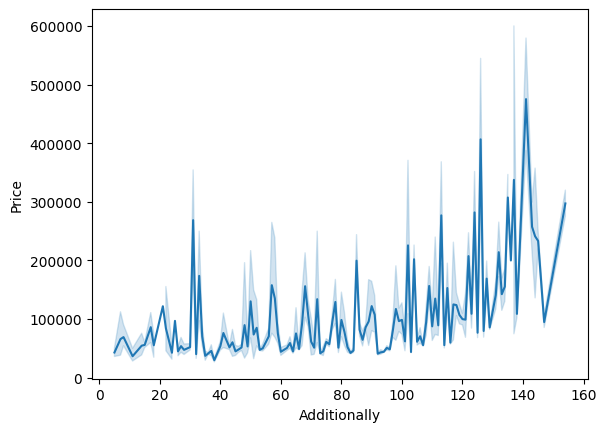

In [80]:
sns.lineplot(add_without_nan, x='Additionally', y='Price')

### Changing

In [81]:
cian_cut['Additionally_modified'] = cian_cut['Additionally']

/tmp/ipykernel_38896/4185689845.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Additionally_modified'] = cian_cut['Additionally']


In [82]:
cian_cut['Additionally_modified'] =\
    cian_cut['Additionally_modified'].apply(lambda s: len(s) if s==s else 200)

/tmp/ipykernel_38896/2013176497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Additionally_modified'] =\


## [Name_of_residental] excluded

In [83]:
cian_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_number               19737 non-null  int64  
 1   Price                   19737 non-null  int64  
 2   Children_pets allowed   14822 non-null  object 
 3   Additionally            19465 non-null  object 
 4   Name_of_residental      4456 non-null   object 
 5   Height_of_ceilings      10535 non-null  float64
 6   Elevator                15545 non-null  object 
 7   Garbage_chute           11730 non-null  object 
 8   Children_pets_modified  19737 non-null  object 
 9   Children_avalible       19737 non-null  int64  
 10  Pets_avalible           19737 non-null  int64  
 11  Additionally_modified   19737 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.8+ MB


In [84]:
cian_cut['Name_of_residental'].value_counts()

Символ, 2019                     61
Водный, 2015                     45
Квартал на Ленинском             37
Метрополия, 2021                 36
Триумф-Палас, 2006               35
                                 ..
На Базовской                      1
Талисман на Дмитровском, 2022     1
Беловежская пуща                  1
Ильменский 17, 1967               1
В Солнцево                        1
Name: Name_of_residental, Length: 1133, dtype: int64

## ['Height_of_ceilings'] excluded

In [85]:
cian_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_number               19737 non-null  int64  
 1   Price                   19737 non-null  int64  
 2   Children_pets allowed   14822 non-null  object 
 3   Additionally            19465 non-null  object 
 4   Name_of_residental      4456 non-null   object 
 5   Height_of_ceilings      10535 non-null  float64
 6   Elevator                15545 non-null  object 
 7   Garbage_chute           11730 non-null  object 
 8   Children_pets_modified  19737 non-null  object 
 9   Children_avalible       19737 non-null  int64  
 10  Pets_avalible           19737 non-null  int64  
 11  Additionally_modified   19737 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.8+ MB


In [86]:
cian_cut.loc[:, ['Height_of_ceilings']].value_counts()

Height_of_ceilings
2.64                  4467
3.00                  1191
2.70                   929
2.48                   675
3.20                   597
                      ... 
2.76                     1
3.92                     1
2.73                     1
4.05                     1
1.20                     1
Length: 89, dtype: int64

In [87]:
cian_cut.loc[cian_cut['Height_of_ceilings'] == 2.64, 'Price'].describe()

count      4467.000000
mean      42853.189613
std       12310.774148
min       15000.000000
25%       35000.000000
50%       40000.000000
75%       50000.000000
max      170000.000000
Name: Price, dtype: float64

In [88]:
cian_cut.loc[cian_cut['Height_of_ceilings'] == 3, 'Price'].describe()

count    1.191000e+03
mean     1.333432e+05
std      1.343365e+05
min      5.000000e+03
25%      6.000000e+04
50%      9.000000e+04
75%      1.500000e+05
max      1.500000e+06
Name: Price, dtype: float64

In [89]:
cian_cut.loc[cian_cut['Height_of_ceilings'].isna(), 'Price'].describe()

count    9.202000e+03
mean     9.829710e+04
std      1.485695e+05
min      5.000000e+03
25%      4.000000e+04
50%      5.500000e+04
75%      8.900000e+04
max      3.000000e+06
Name: Price, dtype: float64

## ['Elevator']

### Research

In [90]:
cian_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_number               19737 non-null  int64  
 1   Price                   19737 non-null  int64  
 2   Children_pets allowed   14822 non-null  object 
 3   Additionally            19465 non-null  object 
 4   Name_of_residental      4456 non-null   object 
 5   Height_of_ceilings      10535 non-null  float64
 6   Elevator                15545 non-null  object 
 7   Garbage_chute           11730 non-null  object 
 8   Children_pets_modified  19737 non-null  object 
 9   Children_avalible       19737 non-null  int64  
 10  Pets_avalible           19737 non-null  int64  
 11  Additionally_modified   19737 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 1.8+ MB


In [91]:
cian_cut['Elevator']

0        Пасс (4), Груз (1)
1        Пасс (1), Груз (1)
2                  Пасс (1)
3                  Пасс (1)
4        Пасс (1), Груз (1)
                ...        
19732    Пасс (1), Груз (1)
19733    Пасс (1), Груз (1)
19734                   NaN
19735              Пасс (3)
19736              Пасс (3)
Name: Elevator, Length: 19737, dtype: object

In [92]:
cian_cut['Elevator'].value_counts()

Пасс (1)               4865
Пасс (2)               3997
Пасс (1), Груз (1)     3431
Пасс (2), Груз (1)     1091
Пасс (2), Груз (2)      606
Пасс (3)                545
Пасс (4)                307
Пасс (3), Груз (1)      170
Пасс (1), Груз (2)      168
Пасс (4), Груз (2)       60
Груз (1)                 57
Пасс (4), Груз (1)       55
Пасс (3), Груз (3)       42
Пасс (3), Груз (2)       36
Груз (4)                 25
Пасс (4), Груз (4)       23
Груз (2)                 18
Груз (3)                 15
Пасс (4), Груз (3)        7
Пасс (6)                  6
Пасс (1), Груз (3)        5
Пасс (60)                 2
Пасс (2), Груз (3)        2
Пасс (50)                 2
Пасс (5), Груз (1)        1
Пасс (1), Груз (12)       1
Пасс (8), Груз (8)        1
Пасс (7)                  1
Пасс (1), Груз (4)        1
Пасс (5), Груз (3)        1
Пасс (2), Груз (4)        1
Груз (6)                  1
Груз (8)                  1
Пасс (5)                  1
Name: Elevator, dtype: int64

### Changing

In [93]:
cian_cut['Elevator_modified'] = cian_cut['Elevator'].apply(lambda s: s.split(', ') if s == s else s)

/tmp/ipykernel_38896/1970903272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Elevator_modified'] = cian_cut['Elevator'].apply(lambda s: s.split(', ') if s == s else s)


In [94]:
elivators = cian_cut['Elevator_modified'].explode().dropna()

In [95]:
cian_cut['Elevator_Pass'] = 0
cian_cut['Elevator_Cargo'] = 0

/tmp/ipykernel_38896/638786419.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Elevator_Pass'] = 0
/tmp/ipykernel_38896/638786419.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Elevator_Cargo'] = 0


In [96]:
def count_of_elev(s):
    return int(s.split()[1][1:-1])

In [97]:
for i in elivators.index:
    
    if type(elivators.loc[i]) == str:
        
        if 'Пасс' in elivators.loc[i]:
            cian_cut.loc[i, 'Elevator_Pass'] = count_of_elev(elivators.loc[i])
        elif 'Груз' in elivators.loc[i]:
            cian_cut.loc[i, 'Elevator_Cargo'] = count_of_elev(elivators.loc[i])
            
    else:
               
        for el in elivators.loc[i]:
            
            if 'Пасс' in el:
                cian_cut.loc[i, 'Elevator_Pass'] = count_of_elev(el)
            elif 'Груз' in el:
                cian_cut.loc[i, 'Elevator_Cargo'] = count_of_elev(el)

## ['Garbage_chute']

### Research

In [98]:
cian_cut['Garbage_chute'].isna().value_counts()

False    11730
True      8007
Name: Garbage_chute, dtype: int64

In [99]:
cian_cut['Garbage_chute'].value_counts()

Да     10262
Нет     1468
Name: Garbage_chute, dtype: int64

In [100]:
cian_cut.loc[cian_cut['Garbage_chute'] == 'Да', 'Price'].describe()

count    1.026200e+04
mean     6.524251e+04
std      9.022933e+04
min      5.000000e+03
25%      3.700000e+04
50%      4.500000e+04
75%      6.000000e+04
max      3.000000e+06
Name: Price, dtype: float64

In [101]:
cian_cut.loc[cian_cut['Garbage_chute'] == 'Нет', 'Price'].describe()

count    1.468000e+03
mean     9.804098e+04
std      1.298558e+05
min      1.600000e+04
25%      4.000000e+04
50%      5.500000e+04
75%      9.500000e+04
max      1.500000e+06
Name: Price, dtype: float64

In [102]:
cian_cut.loc[cian_cut['Garbage_chute'].isna(), 'Price'].describe()

count    8.007000e+03
mean     1.117857e+05
std      1.603600e+05
min      5.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      1.100000e+05
max      3.000000e+06
Name: Price, dtype: float64

### Changing

In [103]:
cian_cut['Garbage_chute_modified'] = cian_cut['Garbage_chute']

/tmp/ipykernel_38896/1931409354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Garbage_chute_modified'] = cian_cut['Garbage_chute']


In [104]:
cian_cut['Garbage_chute_modified'].fillna('Нет', inplace=True)

/tmp/ipykernel_38896/2907397477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Garbage_chute_modified'].fillna('Нет', inplace=True)


In [105]:
cian_cut['Garbage_chute_modified'].replace(['Да', 'Нет'], [1, 0], inplace=True)

/tmp/ipykernel_38896/1992248002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Garbage_chute_modified'].replace(['Да', 'Нет'], [1, 0], inplace=True)


## ['Bathroom_toilet']

In [106]:
cian_cut2 = cian[['ID_number', 'Bathroom_toilet']]

In [107]:
cian_cut2['Bathroom_toilet'].value_counts()

Совмещенный (1)                    8500
Раздельный (1)                     6139
Совмещенный (2)                    1293
Совмещенный (1), Раздельный (1)     730
Раздельный (2)                      401
Совмещенный (3)                     223
Совмещенный (2), Раздельный (1)     179
Совмещенный (4)                      74
Раздельный (3)                       44
Совмещенный (1), Раздельный (2)      28
Совмещенный (3), Раздельный (1)      26
Совмещенный (2), Раздельный (2)      22
Раздельный (4)                       15
Совмещенный (3), Раздельный (3)       6
Совмещенный (4), Раздельный (1)       6
Совмещенный (4), Раздельный (2)       4
Совмещенный (1), Раздельный (3)       2
Совмещенный (2), Раздельный (3)       2
Совмещенный (2), Раздельный (4)       1
Совмещенный (3), Раздельный (2)       1
Name: Bathroom_toilet, dtype: int64

In [108]:
bath_toilet = cian_cut2['Bathroom_toilet'].apply(lambda s: s.split(', ') if s == s else s)

In [109]:
bath_toilet = bath_toilet.explode().dropna()

In [110]:
cian_cut['Bath_combinated'] = 0
cian_cut['Bath_separated'] = 0

/tmp/ipykernel_38896/580843665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Bath_combinated'] = 0
/tmp/ipykernel_38896/580843665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cian_cut['Bath_separated'] = 0


In [111]:
for i in bath_toilet.index:
    
    if type(bath_toilet.loc[i]) == str:
        
        if 'Совмещенный' in bath_toilet.loc[i]:
            cian_cut.loc[i, 'Bath_combinated'] = count_of_elev(bath_toilet.loc[i])
        elif 'Раздельный' in bath_toilet.loc[i]:
            cian_cut.loc[i, 'Bath_separated'] = count_of_elev(bath_toilet.loc[i])
            
    else:
               
        for el in bath_toilet.loc[i]:
            
            if 'Совмещенный' in el:
                cian_cut.loc[i, 'Bath_combinated'] = count_of_elev(el)
            elif 'Раздельный' in el:
                cian_cut.loc[i, 'Bath_separated'] = count_of_elev(el)


## Summary

In [112]:
cian_cut[['ID_number', 'Children_avalible', 'Pets_avalible',
          'Additionally_modified', 'Elevator_Pass', 'Elevator_Cargo',
          'Garbage_chute_modified', 'Bath_separated', 'Bath_combinated']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   ID_number               19737 non-null  int64
 1   Children_avalible       19737 non-null  int64
 2   Pets_avalible           19737 non-null  int64
 3   Additionally_modified   19737 non-null  int64
 4   Elevator_Pass           19737 non-null  int64
 5   Elevator_Cargo          19737 non-null  int64
 6   Garbage_chute_modified  19737 non-null  int64
 7   Bath_separated          19737 non-null  int64
 8   Bath_combinated         19737 non-null  int64
dtypes: int64(9)
memory usage: 1.4 MB


In [113]:
cian_cut[['ID_number', 'Children_avalible', 'Pets_avalible',
          'Additionally_modified', 'Elevator_Pass', 'Elevator_Cargo',
          'Garbage_chute_modified', 'Bath_separated', 'Bath_combinated']].to_csv('cian_nik.csv')